In [180]:
# Đọc dữ liệu từ tập tin CSV
import pandas as pd
# Đường dẫn đến tập tin CSV
#file_path = 'C:\\Users\\LG\\Desktop\\BD_DQ\\data_dotquy.csv'
#file_path = 'C:\\Users\\Admin\\Desktop\\BD_DQ\\data_dotquy.csv'
file_path = 'C:/Users/Dell/OneDrive/Desktop/BD_DQ/data_dotquy.csv'
# Đọc dữ liệu từ CSV vào DataFrame
df = pd.read_csv(file_path)
# Hiển thị DataFrame trong VS Code
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0           Private          Urban             228.69  36.6  former

LÀM SẠCH và CHUẨN HÓA DL
- 1 giới tính: loại other
- 2 tuổi: Loại số thực ( vd: 0.1 , 1.56) rồi dùng kỹ thuật Age Grouping
- 3 Đã kết hôn: chuyển về 0 và một
- 4 kiểu làm việc(work_type)
    + kỹ thuật Hashing Encoding
    + kỹ thuật One-Hot Encoding
- 5 vùng sống: chuyển về 0 và một
- 6 BMI  
    + Loại bỏ các hàng hoặc cột có N/A rồi dùng kỹ thuật Binary Encoding
    + dùng kỹ thuật Simple Imputation rồi dùng kỹ thuật tiếp Min-Max Scaling
- 7 smoking_status
  + Loại bỏ các hàng hoặc cột có Unknown rồi dùng kỹ thuật tiếp Min-Max Scaling
  + kỹ thuật Frequency Encoding
- 8 avg_glucose_level (mg/dL)
    DÙNG KỸ THUẬT: Min-Max Scaling
  ******ĐIỀU KIỆN LÀ******
    Người bình thường:
     < 140
    Người Bị tiểu đường:
      >=140

In [181]:
#Hien
#Kiem tra trung lap
duplicated_rows = df[df.duplicated(subset='id')]
print("So luong du lieu trung lap la:" , len(duplicated_rows))

#df = df.dropna()
#df = df.applymap(lambda x: x.replace("\n"," ") if isinstance(x, str) else x )

So luong du lieu trung lap la: 0


In [182]:
#hien
#Kiểm tra dữ liệu có bị thiếu
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [183]:
#Hien
# dùng knn điền dữ liệu thiếu vào BMI
# Tạo đối tượng KNN Imputer với số lượng hàng xóm là 3
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)

# Áp dụng imputer cho DataFrame, chỉ chọn các cột số
df[['age', 'bmi']] = imputer.fit_transform(df[['age', 'bmi']])

# Hiển thị DataFrame sau khi điền dữ liệu
print(df)

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level        bmi  \
0           Private          Urban             228.69  36.600000   
1     Self-

In [184]:
# Kiểm tra lại đã dủ dữ liệu chưa
df['bmi'].isnull().sum()
df['bmi']

0       36.600000
1       28.866667
2       32.500000
3       34.400000
4       24.000000
          ...    
5105    26.733333
5106    40.000000
5107    30.600000
5108    25.600000
5109    26.200000
Name: bmi, Length: 5110, dtype: float64

In [185]:
#Hien
# Xóa cột mã định danh
df  = df.drop(columns=['id'])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.866667,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,26.733333,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [186]:
#Chau_Muc1
#Loại bỏ giới tính mang giá trị Other
mask = df['gender'].isin(['Male', 'Female'])
df = df[mask]
print(df)

      gender   age  hypertension  heart_disease ever_married      work_type  \
0       Male  67.0             0              1          Yes        Private   
1     Female  61.0             0              0          Yes  Self-employed   
2       Male  80.0             0              1          Yes        Private   
3     Female  49.0             0              0          Yes        Private   
4     Female  79.0             1              0          Yes  Self-employed   
...      ...   ...           ...            ...          ...            ...   
5105  Female  80.0             1              0          Yes        Private   
5106  Female  81.0             0              0          Yes  Self-employed   
5107  Female  35.0             0              0          Yes  Self-employed   
5108    Male  51.0             0              0          Yes        Private   
5109  Female  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi  

In [187]:
#Chau_Muc1
# gender: female 1 male 0
df.loc[:, 'gender'] = df['gender'].replace({'Female': 1, 'Male': 0})
print(df)

     gender   age  hypertension  heart_disease ever_married      work_type  \
0         0  67.0             0              1          Yes        Private   
1         1  61.0             0              0          Yes  Self-employed   
2         0  80.0             0              1          Yes        Private   
3         1  49.0             0              0          Yes        Private   
4         1  79.0             1              0          Yes  Self-employed   
...     ...   ...           ...            ...          ...            ...   
5105      1  80.0             1              0          Yes        Private   
5106      1  81.0             0              0          Yes  Self-employed   
5107      1  35.0             0              0          Yes  Self-employed   
5108      0  51.0             0              0          Yes        Private   
5109      1  44.0             0              0          Yes       Govt_job   

     Residence_type  avg_glucose_level        bmi   smoking_sta

C:\Users\Dell\AppData\Local\Temp\ipykernel_16320\1985870924.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'gender'] = df['gender'].replace({'Female': 1, 'Male': 0})


In [188]:
#Chau_Muc5(Phần này phân công cho GIANG)
# Residence_type: urban 1 rural 0(can note)
#df.loc[:, 'Residence_type'] = df['Residence_type'].replace({'Urban': 1, 'Rural': 0})


In [189]:
#Chau_Muc4(Phần này lấy code của bạn GIANG)
#chuẩn hóa dữ liệu field work_type theo kỹ thuật label encoding
#from sklearn.preprocessing import LabelEncoder
#le=LabelEncoder()
#df.loc[:, 'work_type'] = le.fit_transform(df['work_type'])
#print(df)

In [190]:
#Chi_Muc2
# Kiểm tra xem tuổi có phải là số nguyên hay không
df['Is_Whole_Number'] = df['age'].apply(lambda x: x.is_integer())

# Lọc các hàng mà tuổi không phải là số thực (chỉ giữ lại số nguyên)
df = df[df['Is_Whole_Number']]

# Xóa cột tạm thời 'Is_Whole_Number'
df = df.drop(columns=['Is_Whole_Number'])

df

C:\Users\Dell\AppData\Local\Temp\ipykernel_16320\1090353858.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Is_Whole_Number'] = df['age'].apply(lambda x: x.is_integer())


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,61.0,0,0,Yes,Self-employed,Rural,202.21,28.866667,never smoked,1
2,0,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,1,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,Yes,Private,Urban,83.75,26.733333,never smoked,0
5106,1,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [191]:
#Chi_Muc2
# Chuẩn hóa bằng Min-Max Scaling
# Calculate min and max values
X_min = min(df['age'])
X_max = max(df['age'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['age']]

# Gán lại dữ liệu vào cột ['avg_glucose_level']
df['age'] = scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,Yes,Self-employed,Rural,202.21,28.866667,never smoked,1
2,0,0.975309,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,Yes,Private,Urban,83.75,26.733333,never smoked,0
5106,1,0.987654,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [192]:
#Chi(điều chỉnh tuổi về min max)
# Định nghĩa các khoảng tuổi và các nhãn cho các nhóm tuổi
#bins = [0, 18, 35, 60, 100]
#labels = ['0', '1', '2', '3']

# Chia cột "Age" thành các nhóm tuổi
#df['Age Group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

#df

In [193]:
#Chi_Muc3
#Chuyen trạng thái đã kết hôn về dạng 1 và chưa kết hôn về dạng 0
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,Private,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,Self-employed,Rural,202.21,28.866667,never smoked,1
2,0,0.975309,0,1,1,Private,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,1,Private,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,1,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,Private,Urban,83.75,26.733333,never smoked,0
5106,1,0.987654,0,0,1,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,1,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,1,Private,Rural,166.29,25.600000,formerly smoked,0


In [194]:
#Giang_Muc4(Gán thẳng giá trị vào work_type)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['work_type'] = label_encoder.fit_transform(df['work_type'])

# sử dụng chuẩn hóa bằng Min-Max Scaling chuan hoa df['work_type'] dang (0 1 2 3 4)
# Calculate min and max values
X_min = min(df['work_type'])
X_max = max(df['work_type'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['work_type']]
scaled_data
# Tạo ra trường dữ liệu mới work_type_2
df['work_type'] =scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,Urban,228.69,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,0.75,Rural,202.21,28.866667,never smoked,1
2,0,0.975309,0,1,1,0.50,Rural,105.92,32.500000,never smoked,1
3,1,0.592593,0,0,1,0.50,Urban,171.23,34.400000,smokes,1
4,1,0.962963,1,0,1,0.75,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,Urban,83.75,26.733333,never smoked,0
5106,1,0.987654,0,0,1,0.75,Urban,125.20,40.000000,never smoked,0
5107,1,0.419753,0,0,1,0.75,Rural,82.99,30.600000,never smoked,0
5108,0,0.617284,0,0,1,0.50,Rural,166.29,25.600000,formerly smoked,0


In [195]:
#Giang_Muc5
# Chuyen trạng thái thành thị về dạng 1 và nông thôn về dạng 0
df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})
mask = df['gender'] != 'Other'
df_filtered = df[mask]
print(df_filtered) 

     gender       age  hypertension  heart_disease  ever_married  work_type  \
0         0  0.814815             0              1             1       0.50   
1         1  0.740741             0              0             1       0.75   
2         0  0.975309             0              1             1       0.50   
3         1  0.592593             0              0             1       0.50   
4         1  0.962963             1              0             1       0.75   
...     ...       ...           ...            ...           ...        ...   
5105      1  0.975309             1              0             1       0.50   
5106      1  0.987654             0              0             1       0.75   
5107      1  0.419753             0              0             1       0.75   
5108      0  0.617284             0              0             1       0.50   
5109      1  0.530864             0              0             1       0.00   

      Residence_type  avg_glucose_level        bmi 

C:\Users\Dell\AppData\Local\Temp\ipykernel_16320\3576080175.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Residence_type']=df['Residence_type'].replace({'Urban':1,'Rural':0})


In [196]:
#Hien_Mục6
# chuẩn hóa bằng Min-Max Scaling
glucose_values = df['avg_glucose_level']

# Calculate min and max values
X_min = min(df['avg_glucose_level'])
X_max = max(df['avg_glucose_level'])

# Apply Min-Max Scaling
scaled_data = [(x - X_min) / (X_max - X_min) for x in df['avg_glucose_level']]

# Gán lại dữ liệu vào cột ['avg_glucose_level']
df['avg_glucose_level'] = scaled_data
df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,36.600000,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,28.866667,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,32.500000,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,34.400000,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,1,0.132167,26.733333,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,40.000000,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,30.600000,never smoked,0
5108,0,0.617284,0,0,1,0.50,0,0.513203,25.600000,formerly smoked,0


In [197]:
#Hoang_Muc7
# Dữ liệu ban đầu
data = df['bmi']

# Min-Max Scaling
data_min = data.min()
data_max = data.max()

scaled_data = (data - data_min) / (data_max - data_min)

# Hiển thị dữ liệu đã chuẩn hóa
print(scaled_data)

0       0.293163
1       0.203553
2       0.245655
3       0.267671
4       0.147161
          ...   
5105    0.178834
5106    0.332561
5107    0.223638
5108    0.165701
5109    0.172654
Name: bmi, Length: 4994, dtype: float64


In [198]:
#Hoang_Muc7
df['bmi']=scaled_data
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.203553,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0.975309,1,0,1,0.50,1,0.132167,0.178834,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,0.332561,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,0.223638,never smoked,0
5108,0,0.617284,0,0,1,0.50,0,0.513203,0.165701,formerly smoked,0


In [199]:
#Hoang_Muc7
# Dữ liệu ban đầu
data = df['bmi']

# Chuyển đổi dữ liệu thành DataFrame
dff = pd.DataFrame(data, columns=['bmi'])
dff

,bmi
0,0.293163
1,0.203553
2,0.245655
3,0.267671
4,0.147161
...,...
5105,0.178834
5106,0.332561
5107,0.223638
5108,0.165701


In [200]:
#Hoang_Muc7
#import numpy as np
#conditions = [
   # (dff['bmi'] < 18.5),
  #  (dff['bmi'] >= 18.5) & (dff['bmi'] <= 25),
    #(dff['bmi'] > 25)
#]

# Các giá trị tương ứng cho mỗi điều kiện
#df['underweight'] = np.where(dff['bmi'] < 18.5, 1, 0)
#df['normal'] = np.where((dff['bmi'] >= 18.5) & (dff['bmi'] <= 25), 1, 0)
#df['overweight'] = np.where(dff['bmi'] > 25, 1, 0)

# Hiển thị DataFrame với dữ liệu đã chuẩn hóa
#df

In [201]:
#Binh_Muc8
df.dropna(how='all', inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.203553,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1


In [202]:
#Binh_Muc8
df = df[df['smoking_status'] != 'Unknown']
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0.814815,0,1,1,0.50,1,0.801265,0.293163,formerly smoked,1
1,1,0.740741,0,0,1,0.75,0,0.679023,0.203553,never smoked,1
2,0,0.975309,0,1,1,0.50,0,0.234512,0.245655,never smoked,1
3,1,0.592593,0,0,1,0.50,1,0.536008,0.267671,smokes,1
4,1,0.962963,1,0,1,0.75,0,0.549349,0.147161,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5102,1,0.691358,0,0,1,0.50,0,0.105300,0.120510,never smoked,0
5105,1,0.975309,1,0,1,0.50,1,0.132167,0.178834,never smoked,0
5106,1,0.987654,0,0,1,0.75,1,0.323516,0.332561,never smoked,0
5107,1,0.419753,0,0,1,0.75,0,0.128658,0.223638,never smoked,0


In [203]:
#Binh_Muc8
map_smoking_status = {
    'never smoked': 0,
    'formerly smoked': 0.5,
    'smokes': 1
}

df['smoking_status'] = df['smoking_status'].map(map_smoking_status)

print(df)

     gender       age  hypertension  heart_disease  ever_married  work_type  \
0         0  0.814815             0              1             1       0.50   
1         1  0.740741             0              0             1       0.75   
2         0  0.975309             0              1             1       0.50   
3         1  0.592593             0              0             1       0.50   
4         1  0.962963             1              0             1       0.75   
...     ...       ...           ...            ...           ...        ...   
5102      1  0.691358             0              0             1       0.50   
5105      1  0.975309             1              0             1       0.50   
5106      1  0.987654             0              0             1       0.75   
5107      1  0.419753             0              0             1       0.75   
5108      0  0.617284             0              0             1       0.50   

      Residence_type  avg_glucose_level       bmi  

C:\Users\Dell\AppData\Local\Temp\ipykernel_16320\362241101.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'] = df['smoking_status'].map(map_smoking_status)


CÂN BẰNG MÔ HÌNH 

In [204]:
# Hien
# Kết hợp cả Oversampling và Undersampling để cân bằng dữ liệu 
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split


# Tách dữ liệu thành các biến đặc trưng (X) và biến mục tiêu (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tạo các đối tượng Oversampling và Undersampling
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Tăng cường lớp thiểu số
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Giảm lớp chiếm ưu thế

# Tạo Pipeline kết hợp Oversampling và Undersampling
pipeline = Pipeline(steps=[('o', over), ('u', under)])

# Áp dụng pipeline trên dữ liệu huấn luyện
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

# Kiểm tra kích thước của dữ liệu sau khi cân bằng
print("Kích thước dữ liệu huấn luyện sau khi cân bằng:")
print(f"X_resampled: {X_resampled.shape}")
print(f"y_resampled: {y_resampled.shape}")

# Xem số lượng mẫu trong mỗi lớp sau khi cân bằng
print("Số lượng mẫu trong từng lớp sau khi cân bằng:")
print(y_resampled.value_counts())

# Kết hợp lại X_resampled và y_resampled để tạo thành một DataFrame hoàn chỉnh
df = pd.DataFrame(X_resampled, columns=X.columns)
df['stroke'] = y_resampled

# Xem trước dữ liệu sau khi cân bằng
df

Kích thước dữ liệu huấn luyện sau khi cân bằng:
X_resampled: (3037, 10)
y_resampled: (3037,)
Số lượng mẫu trong từng lớp sau khi cân bằng:
stroke
0    1687
1    1350
Name: count, dtype: int64


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1403,1.0,0.580247,0,0,1,0.500000,0,0.202890,0.125145,0.000000,0
1277,0.0,0.691358,0,0,1,0.500000,1,0.241760,0.210892,0.000000,0
1156,0.0,0.790123,0,0,1,0.500000,0,0.663466,0.253766,0.500000,0
845,0.0,0.543210,0,0,1,0.500000,0,0.014449,0.147161,1.000000,0
1286,1.0,0.456790,0,0,1,0.500000,0,0.225787,0.417149,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
4045,1.0,0.978232,1,0,1,0.690804,0,0.089500,0.206135,0.000000,1
4046,0.0,0.970272,0,1,1,0.000000,0,0.367507,0.169909,0.000000,1
4047,1.0,0.825553,0,0,1,0.637080,1,0.238546,0.261273,0.500000,1
4048,1.0,0.851852,0,1,1,0.500000,0,0.125713,0.234142,0.436006,1


In [205]:
# xem số người bị đột quỵ trong bảng
dfff = df[df['stroke'] == 1]
print("Số người bị đột quỵ là " ) 
len(dfff)

Số người bị đột quỵ là 


1350

In [206]:
# xem số người KHÔNG bị đột quỵ trong bảng
dfff = df[df['stroke'] == 0]
print("Số người KHÔNG bị đột quỵ là " ) 
len(dfff)

Số người KHÔNG bị đột quỵ là 


1687

CÂN BẰNG DỮ LIỆU Ở CỘT "STROKE"

              precision    recall  f1-score   support

           0       0.90      0.84      0.87       546
           1       0.78      0.87      0.82       366

    accuracy                           0.85       912
   macro avg       0.84      0.85      0.85       912
weighted avg       0.86      0.85      0.85       912

Độ chính xác của mô hình Decision Tree là:  85.08771929824562 %


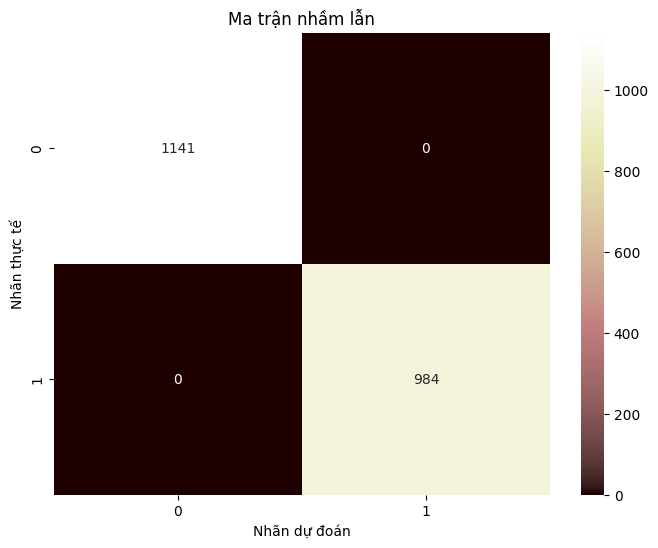

In [232]:
#Chau muc_2
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
x=df.drop(['stroke'],axis=1)
y=df['stroke']
de_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = de_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Độ chính xác của mô hình Decision Tree là: ", de_model.score(X_test, y_test)*100,"%")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(de_model, x_data, y_data):
    # Tính toán dự đoán
    y_pred = de_model.predict(x_data)
    # Lấy các nhãn duy nhất
    labels = np.unique(y_data)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_data, y_pred, labels=labels)
    # Vẽ ma trận nhầm lẫn
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='pink', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()

# Gọi hàm plot_confusion_matrix với mô hình logistic_model, dữ liệu x_train và nhãn y_train
plot_confusion_matrix(de_model, X_train, y_train)


              precision    recall  f1-score   support

           0       0.94      0.93      0.94       347
           1       0.91      0.92      0.92       261

    accuracy                           0.93       608
   macro avg       0.93      0.93      0.93       608
weighted avg       0.93      0.93      0.93       608

Độ chính xác của mô hình Random Forest là:  92.76315789473685 %


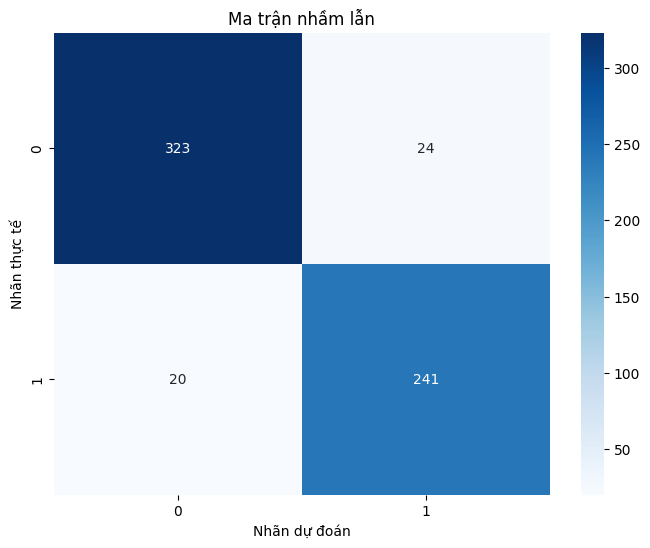

In [233]:
#Chau_muc2
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

X = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status']]
y = df['stroke']
# Chia dữ liệu thành tập huấn luyện và kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)
# Tạo lưới tham số để tìm kiếm
param_dist = {'n_estimators': [100, 200, 300],'max_depth': [5, 10, 15, None],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4],'bootstrap': [True, False]}

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5)
random_search.fit(X_train, y_train)
best_params = random_search.best_params_

# Tạo mô hình với siêu tham số tốt nhất
best_rf = RandomForestClassifier(**best_params, random_state=42)
# Huấn luyện mô hình
best_rf.fit(X_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = best_rf.predict(X_test)
# Đánh giá mô hình
print(classification_report(y_test, y_pred))
print("Độ chính xác của mô hình Random Forest là: ", best_rf.score(X_test, y_test)*100,"%")
# Vẽ ma trận nhầm lẫn
def plot_confusion_matrix(best_rf, X_test, y_test):
    # Dự đoán trên tập kiểm tra
    y_pred = best_rf.predict(X_test)
    # Tính toán ma trận nhầm lẫn
    cm = confusion_matrix(y_test, y_pred)
    # Vẽ biểu đồ
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
    plt.xlabel('Nhãn dự đoán')
    plt.ylabel('Nhãn thực tế')
    plt.title('Ma trận nhầm lẫn')
    plt.show()
# Gọi hàm để vẽ ma trận nhầm lẫn
plot_confusion_matrix(best_rf, X_test, y_test)


             feature  importance
1                age    0.371462
7  avg_glucose_level    0.166337
8                bmi    0.142365
5          work_type    0.111392
9     smoking_status    0.076294
2       hypertension    0.040314
6     Residence_type    0.025735
4       ever_married    0.025638
0             gender    0.024136
3      heart_disease    0.016327


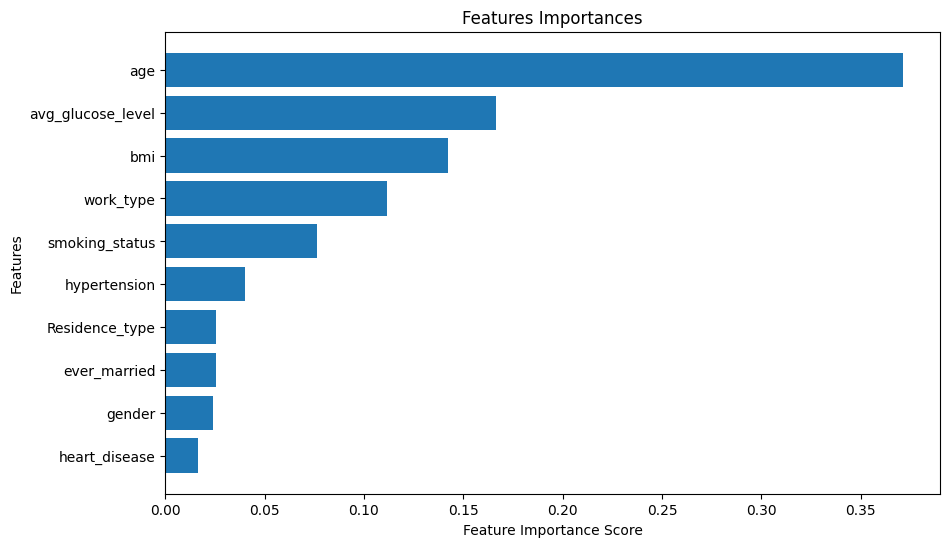

In [179]:
#Chau_muc2
#vẽ features importance
import matplotlib.pyplot as plt
# Quan trọng tính của các đặc trưng
importances = best_rf.feature_importances_
data =pd.DataFrame( {'feature': ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status'],'importance': best_rf.feature_importances_} )
# Sắp xếp theo thứ tự giảm dần của quan trọng tính
data = data.sort_values('importance', ascending=False)
print (data)
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
plt.barh(data['feature'], data['importance'])
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Features Importances')
# Đảo ngược trục y để đặc trưng quan trọng nhất ở trên
plt.gca().invert_yaxis()
plt.show()


In [177]:
#Giang_Muc2

#import thu vien
import numpy as np
import seaborn as sns # mở cmd cài:  pip install seaborn
import matplotlib.pyplot as plt # mở cmd cài:  pip install matplotlib
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [178]:
# #Train căn bản
# from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(random_state= 10000)

# clf.fit(X_train, y_train)

# #Dự đoán
# from sklearn.metrics import classification_report, confusion_matrix

# # Dự đoán trên tập dữ liệu kiểm thử
# y_pred = clf.predict(X_test)

# # In báo cáo phân loại
# print("Classification Report:")
# print(classification_report(y_test, y_pred))